In [2]:
import qutip as qp
import waveforms as waveforms
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
import cv2

from imp import reload

/var/folders/z9/zsb0ck7s4bxd7nwf3h60xzxw0000gn/T/ipykernel_62484/1611930659.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [3]:
import rotate as rotate

### 简单

In [4]:
#设置哈密顿量
omega = 1
H0 = (1/2) * (omega * qp.sigmax()  + 0.9 * omega *qp.sigmaz())

#qubit 
ground = qp.basis(2,0)
excited = qp.basis(2,1)
start = ground

#演化时间
tlist = np.linspace(0,10,101) 

#计算
result = qp.mesolve(H0,start,tlist,e_ops=[qp.sigmax(),qp.sigmay(),qp.sigmaz()])

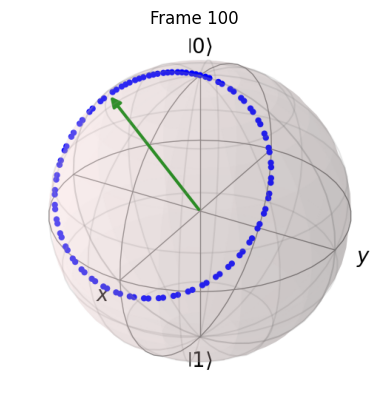

In [5]:
reload(rotate)
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]
rotate.cartoon(x,y,z,'rabi')


### Spectrum

In [61]:
omega = 1
omega_rf = 0
delay = 10
tlist = np.linspace(0, 20, 501)  # 时间步长和时间轴定义
sq_length = 20
sq_amp = 0.8

start = qp.basis(2,0)


# H_0
H_0 = (1/2)*omega*qp.sigmaz()

#H_1
def H_1(t, args):
    delay = args['delay'] 
    omega_rf = args['omega_rf'] 
    square = waveforms.square(sq_length)  # 定义方波函数，10是周期s
    return float(square(t - delay)) * np.cos(omega_rf * t) *qp.sigmax() * sq_amp

def H_total(t, args):
    return H_0 + H_1(t, args)
    # return H_1(t, args)

# 求解薛定谔方程，计算系统随时间的演化
args = {'delay': delay, 'omega_rf':omega_rf} 
result = qp.mesolve(H_total, start, tlist, e_ops=[qp.sigmax(),qp.sigmay(),qp.sigmaz()], args=args)


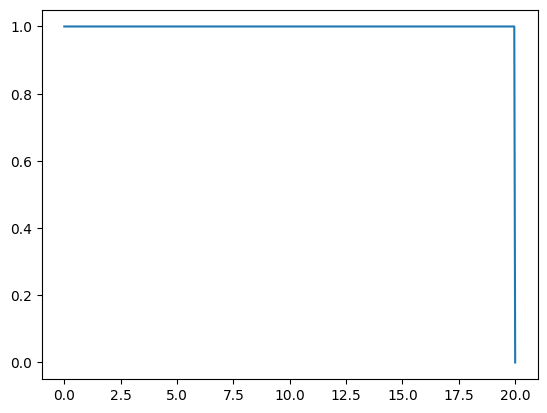

In [62]:
square = waveforms.square(sq_length)  # 定义方波函数，10是周期s
plt.plot(tlist,square(tlist-delay))

<module 'matplotlib.pyplot' from 'c:\\Users\\NUC\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

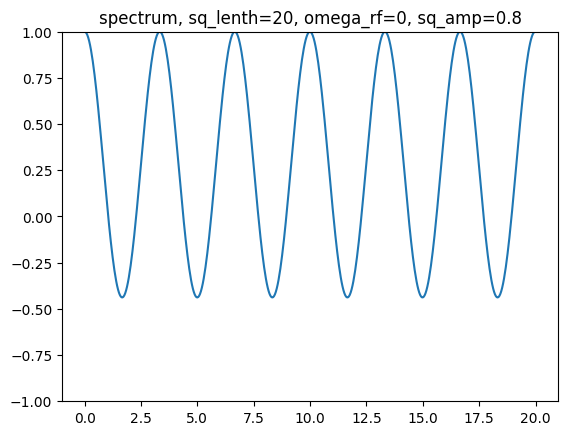

In [63]:
reload(rotate)
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]
plt.plot(tlist,z)
plt.ylim(-1,1)
plt.title(f'spectrum, sq_lenth={sq_length}, omega_rf={omega_rf}, sq_amp={sq_amp}')
plt

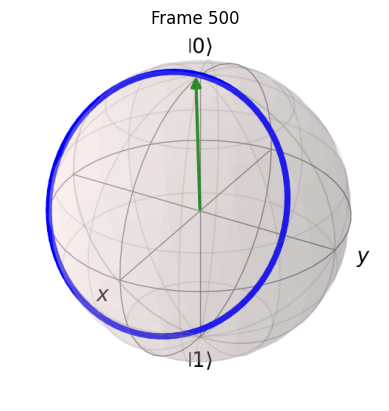

In [64]:
reload(rotate)
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]
rotate.cartoon(x,y,z,f'spectrum sq_lenth={sq_length}, omega_rf={omega_rf}, sq_amp={sq_amp}')

### Rabi

In [176]:
omega = 1
omega_rf = 1.2
delay = 8
tlist = np.linspace(0, 50, 101)  # 时间步长和时间轴定义
sq_length = 90
sq_amp = 0.5

# H_0
H_0 = (1/2)*omega*qp.sigmaz()

#H_1
def H_1(t, args):
    delay = args['delay'] 
    omega_rf = args['omega_rf'] 
    square = waveforms.square(sq_length)  # 定义方波函数，10是周期s
    return float(square(t - delay)) * np.cos(omega_rf * t) *qp.sigmax() * sq_amp

def H_total(t, args):
    return H_0 + H_1(t, args)
    # return H_1(t, args)

# 求解薛定谔方程，计算系统随时间的演化
args = {'delay': delay, 'omega_rf':omega_rf} 
result = qp.mesolve(H_total, start, tlist, e_ops=[qp.sigmax(),qp.sigmay(),qp.sigmaz()], args=args)


<module 'matplotlib.pyplot' from 'c:\\Users\\NUC\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

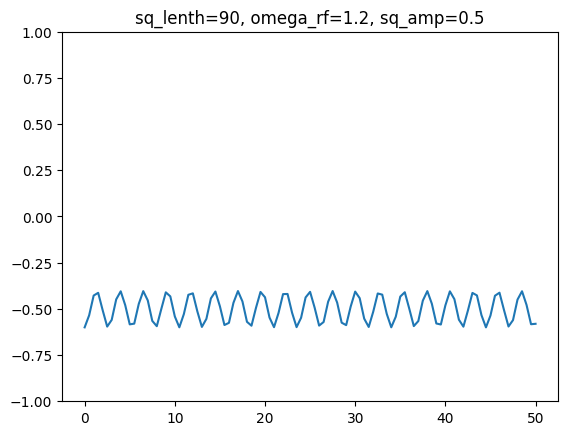

In [178]:
plt.plot(tlist,result.expect[2])
plt.ylim(-1,1)
plt.title(f'sq_lenth={sq_length}, omega_rf={omega_rf}, sq_amp={sq_amp}')
plt

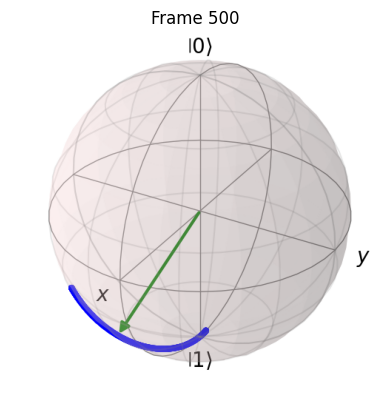

In [165]:
reload(rotate)
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]
rotate.cartoon(x,y,z,f'sq_lenth={sq_length}, omega_rf={omega_rf}, sq_amp={sq_amp}')